In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15.0, 8.0) 

In [2]:
m

NameError: name 'm' is not defined

NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT


/Users/daubert/anaconda3/lib/python3.6/site-packages/healpy/fitsfunc.py:326: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  "assume {}".format(schm))


Ordering converted to RING


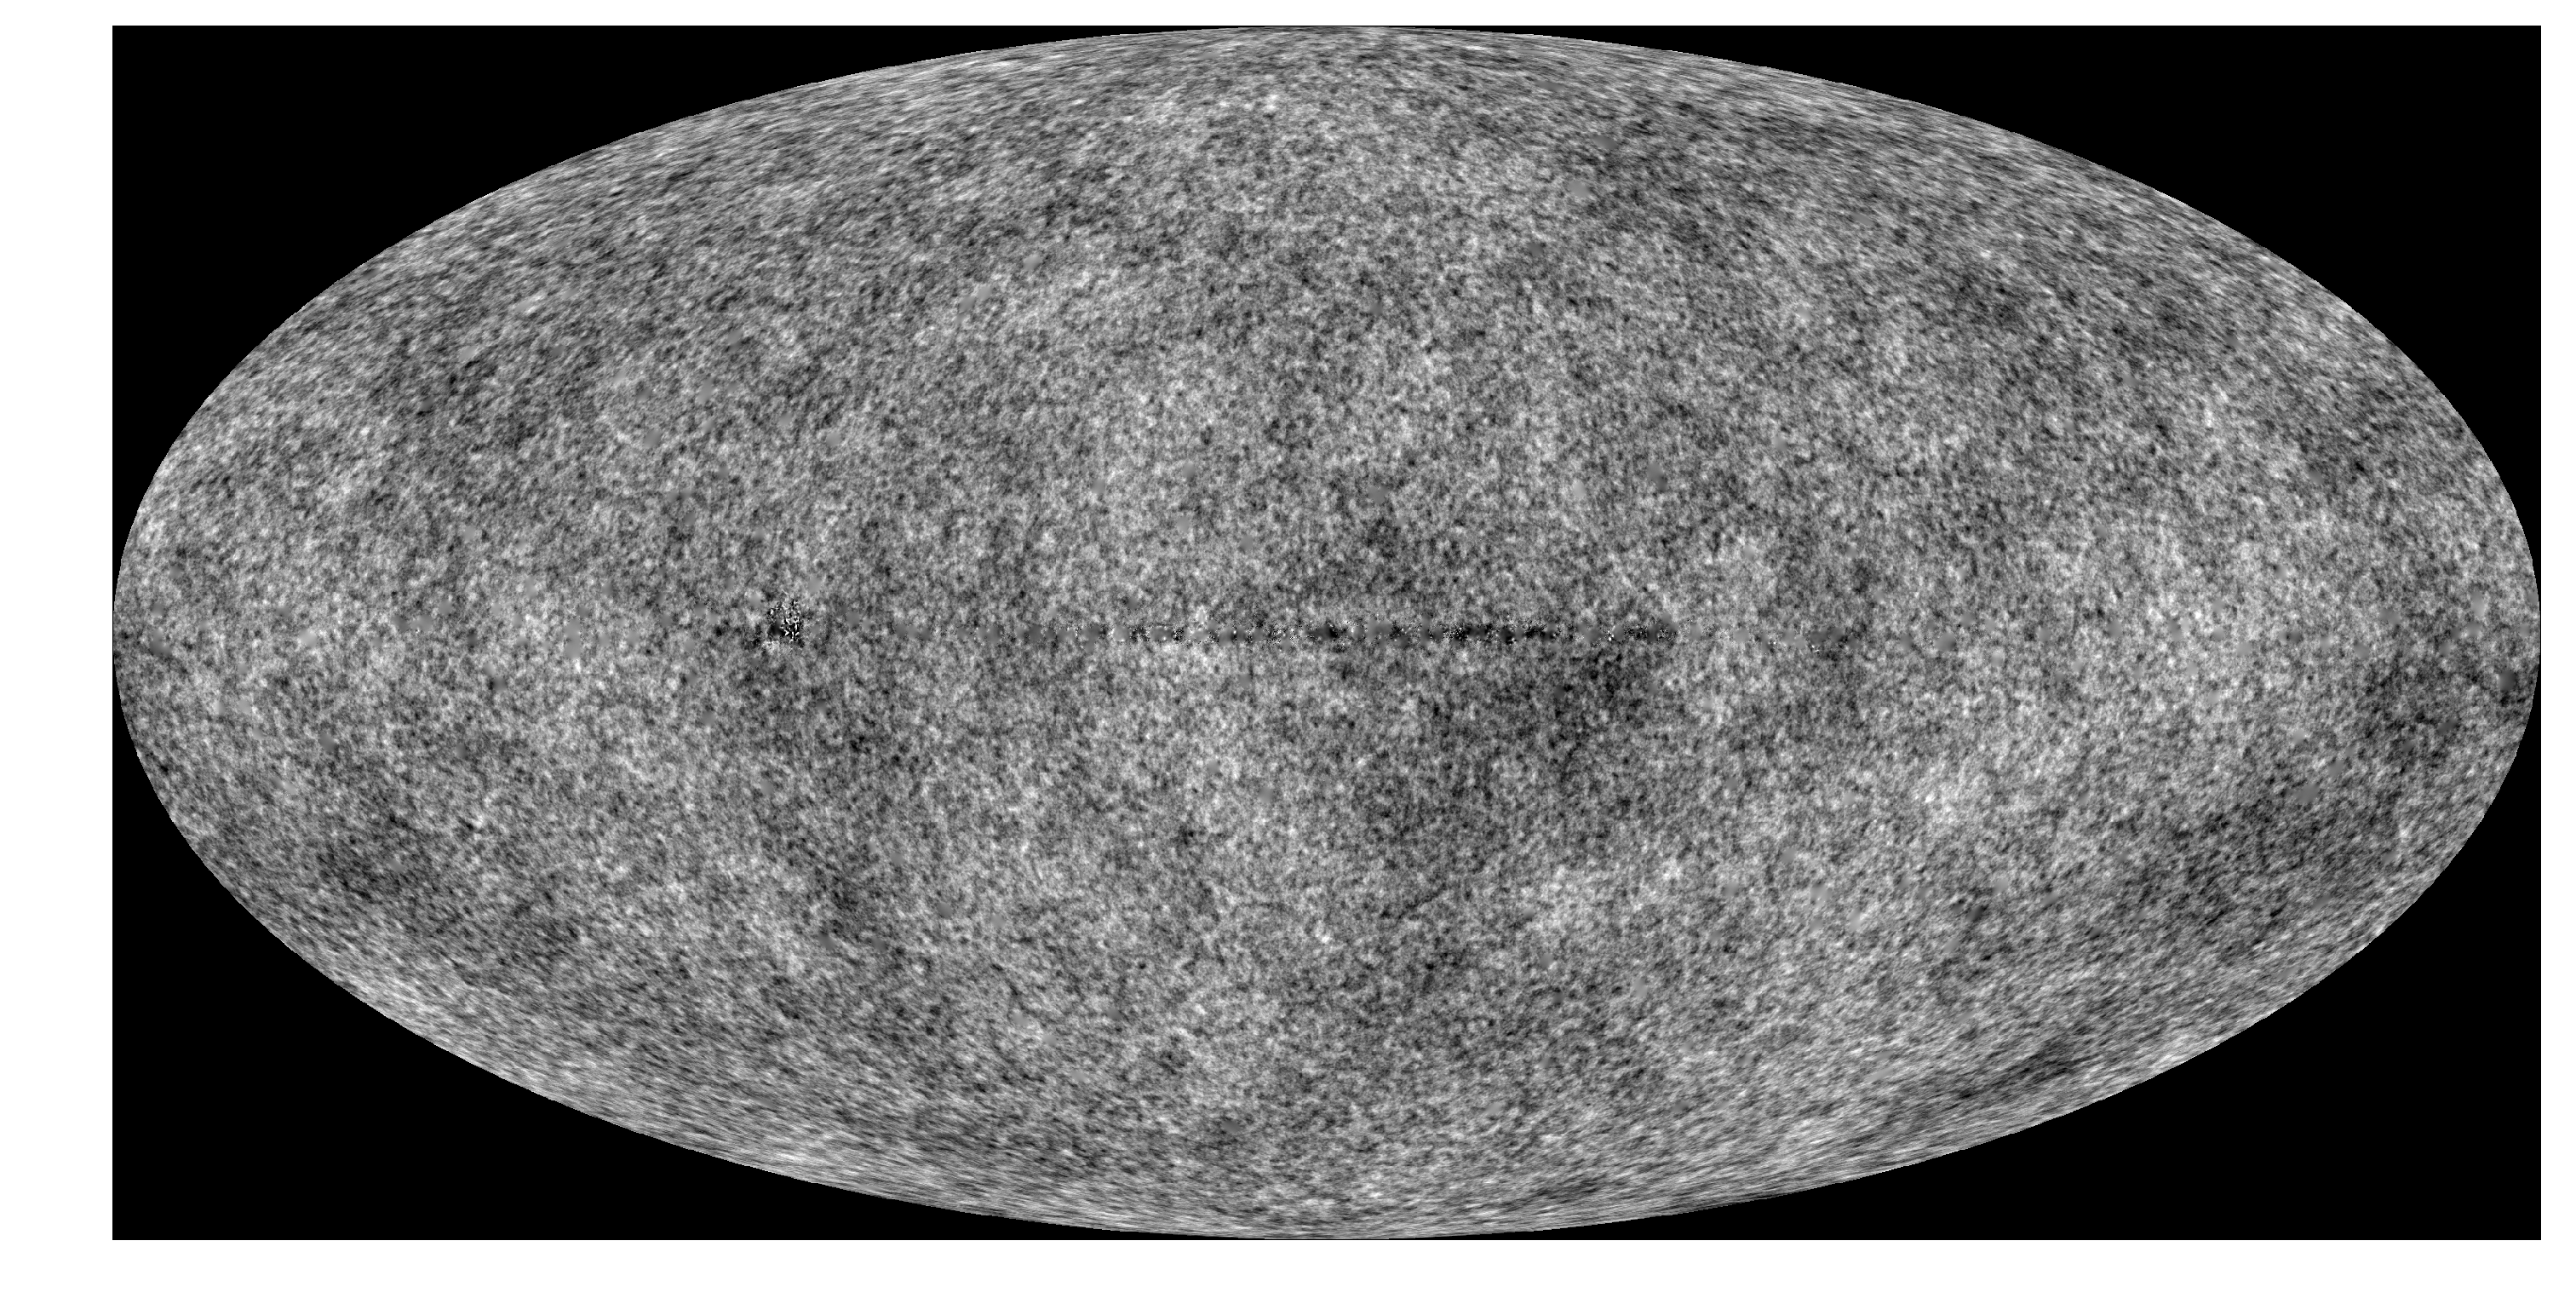

In [3]:
import matplotlib
import healpy as hp
import matplotlib.pyplot as plt

use_planck_cmap = False
# Colormap available from https://github.com/zonca/paperplots/raw/master/data/Planck_Parchment_RGB.txt
# Maps available at: http://irsa.ipac.caltech.edu/data/Planck/release_1/all-sky-maps/
input_filename = "COM_CMB_IQU-smica-field-Int_2048_R2.01_full.fits"
m=hp.read_map(input_filename, ("I_STOKES",))



dpi = 200
figsize_inch = 15, 8
fig = plt.figure(figsize=figsize_inch, dpi=dpi)
# removed the colorbar, the map range is -500 / +500 microK
hp.mollview(m, fig=fig.number, xsize=figsize_inch[0]*dpi, min=-4e-4,max=4e-4,title="", cbar=False,cmap='gray')

plt.savefig("mapplanck.png", dpi=dpi, bbox_inches="tight")




In [33]:
from astropy.io import fits
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
hdul = fits.open('COM_PowerSpect_CMB_R2.02.fits')

In [40]:
thlow=np.loadtxt('thlow.txt',delimiter=';')
thhigh=np.loadtxt('thhigh.txt',delimiter=';')

In [26]:
lowl=hdul[1].data['ELL']
lowDl=hdul[1].data['D_ELL']
lowlerrup=hdul[1].data['ERRUP']
lowlerrdo=hdul[1].data['ERRDOWN']

highl=hdul[7].data['ELL']
highDl=hdul[7].data['D_ELL']
highlerr=hdul[7].data['ERR']


Text(0.5,0,'toto')

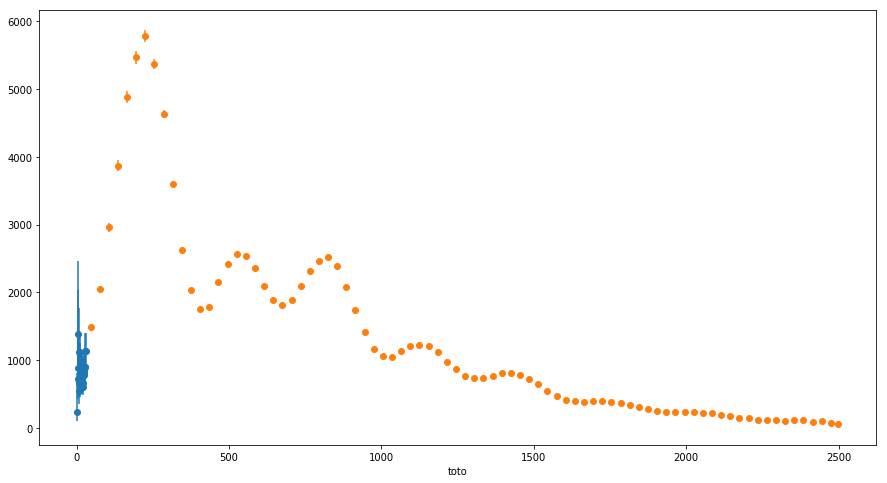

In [52]:
plt.figure()
plt.errorbar(lowl,lowDl,yerr=[errdo,errup],linestyle='none',marker='o')
plt.errorbar(highl,highDl,yerr=highlerr,linestyle='none',marker='o')
plt.xlabel('toto')

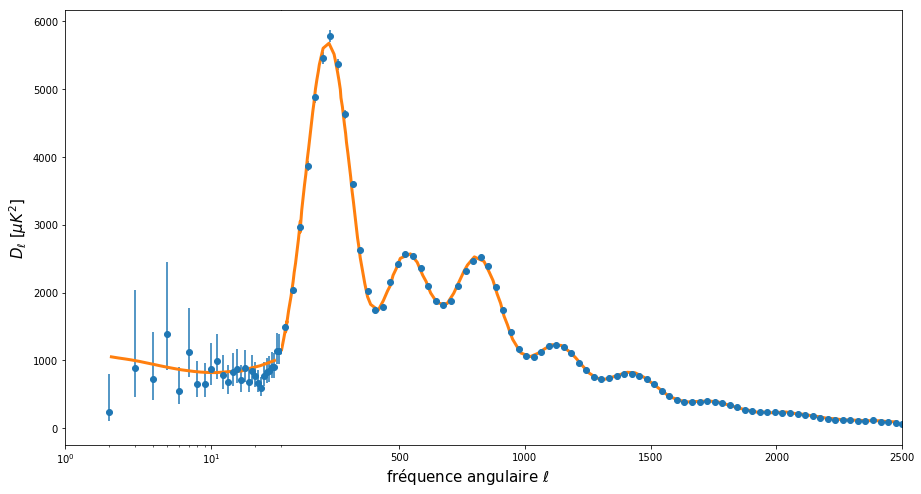

In [72]:

plt.figure()
axMain = plt.subplot(111)
axMain.errorbar(highl,highDl,yerr=highlerr,linestyle='none',marker='o')
axMain.plot(thhigh[:,0],thhigh[:,1],linewidth=3)

axMain.set_xscale('linear')
axMain.set_xlim((30, 2500))
axMain.spines['left'].set_visible(False)
axMain.yaxis.set_ticks_position('right')
axMain.yaxis.set_visible(False)
axMain.xaxis.set_label(r'fréquence angulaire $\ell$')


divider = make_axes_locatable(axMain)
axLin = divider.append_axes("left", size=3.0, pad=0, sharey=axMain)
axLin.set_xscale('log')
axLin.set_xlim((1, 30))
axLin.errorbar(lowl, lowDl, yerr=[errdo,errup],linestyle='none',marker='o')
axLin.plot(thlow[:,0],thlow[:,1],linewidth=3)

axLin.spines['right'].set_visible(False)
axLin.yaxis.set_ticks_position('left')
plt.setp(axLin.get_xticklabels(), visible=True)
axMain.set_xlabel(r'fréquence angulaire $\ell$',size=15)
axMain.xaxis.set_label_coords(0.3,-0.05)
plt.ylabel(r'$D_\ell$ [$\mu K^2$]',size=15)
plt.savefig('clplanck_ok.png',dpi=200,bbox='tight')

In [39]:
sndata=np.loadtxt('SN.txt',usecols=(2,3,4,5))
VSN=sndata[:,0]
DSN=sndata[:,1]

fpdata=np.loadtxt('FP.txt',usecols=(2,3,4))
VFP=fpdata[:,0]
DFP=fpdata[:,2]

tdata=np.loadtxt('TF.txt',usecols=(1,2,3,4))
VTF=tdata[:,0]
DTF=tdata[:,3]

sdata=np.loadtxt('SB.txt',usecols=(1,2,3))
VSB=sdata[:,0]
DSB=sdata[:,2]


In [40]:
VSB

array([ 7441.,  3118.,  4831.,  3468.,  3341.,  5061.])

In [41]:
DSB

array([ 102.3,   36.3,   68.2,   51.5,   55.5,   67.3])

<IPython.core.display.Javascript object>


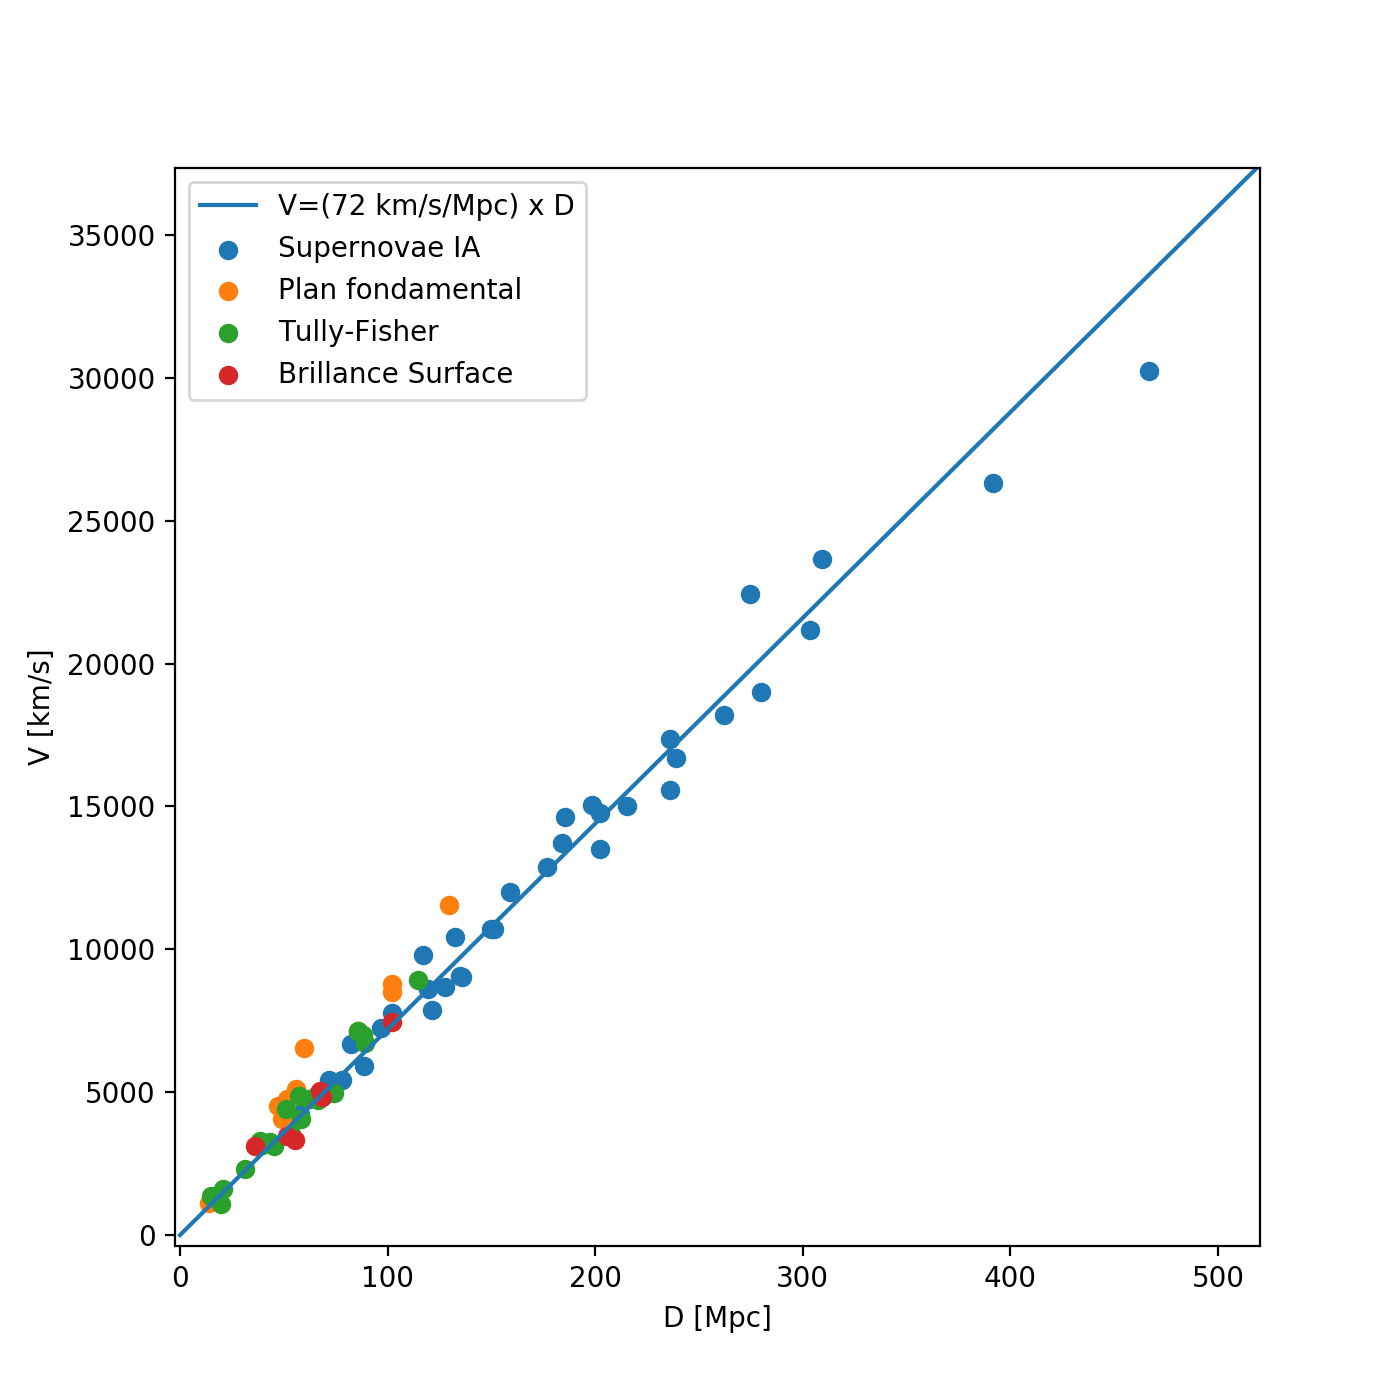

In [47]:
plt.figure()
plt.scatter(DSN,VSN)
plt.scatter(DFP,VFP)
plt.scatter(DTF,VTF)
plt.scatter(DSB,VSB)
dd=np.arange(0,1000)
plt.plot(dd,72*dd)
plt.xlabel('D [Mpc]')
plt.ylabel('V [km/s]')
plt.legend(['V=(72 km/s/Mpc) x D','Supernovae IA','Plan fondamental','Tully-Fisher','Brillance Surface'])